# Fractal Set Interactive Visualization

This notebook demonstrates the interactive visualization of the Fractal Set graph structure,
which provides a complete representation of EuclideanGas execution traces.

**Features:**
- Configure and run Gas simulations
- Build Fractal Set graph from RunHistory
- Interactive timeline to watch graph grow
- Toggle CST (temporal) and IG (selection coupling) edges
- Color nodes by fitness, kinetic energy, alive status
- Color edges by type and cloning potential
- Multiple layout algorithms

In [1]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, 'experiment_scripts')

import panel as pn
import holoviews as hv

# Initialize Panel and HoloViews
pn.extension()
hv.extension('bokeh')

from fractal_set_interactive_viz import (
    FractalSetExplorer,
    create_fractal_set_explorer,
)

print('✅ Imports successful')

✅ Imports successful


## Create the Interactive Dashboard

The dashboard combines three main components:
1. **GasConfig**: Parameter configuration and simulation runner
2. **FractalSet**: Graph builder from RunHistory
3. **InteractiveGraph**: Visualization with dynamic controls

In [2]:
# Create the explorer and dashboard
explorer, dashboard = create_fractal_set_explorer()

print('Dashboard created!')
print(f'Initial configuration:')
print(f'  N = {explorer.config.N} walkers')
print(f'  n_steps = {explorer.config.n_steps}')
print(f'  dims = {explorer.config.dims}D')

Dashboard created!
Initial configuration:
  N = 20 walkers
  n_steps = 100
  dims = 2D


## Launch Interactive Dashboard

**Instructions:**
1. Adjust simulation parameters in the left panel (optional)
2. Click "Run Simulation & Build Fractal Set"
3. Use the `max_timestep` slider to watch the graph grow
4. Toggle CST/IG edges to see different structures
5. Use InteractiveGraph controls to color nodes and edges

**Node Coloring Options:**
- `timestep_viz`: Color by time
- `fitness_viz`: Color by fitness value
- `kinetic_energy`: Color by kinetic energy
- `alive_numeric`: Color by alive status

**Edge Coloring Options:**
- `edge_type_numeric`: CST (0) vs IG (1)
- `V_clone_viz`: Antisymmetric cloning potential (IG edges)
- `displacement`: Position change magnitude (CST edges)

In [3]:
# Display the interactive dashboard
dashboard

Row(sizing_mode='stretch_both')
    [0] Column(max_width=450, min_width=400, sizing_mode='stretch_width')
        [0] Markdown(str)
        [1] Column(min_width=380, sizing_mode='stretch_width')
            [0] Markdown(str)
            [1] Accordion(active=[0], sizing_mode='stretch_width')
                [0] Param(GasConfig, parameters=['N', 'n_steps', ...], show_name=False, sizing_mode='stretch_width', widgets={})
                [1] Param(GasConfig, parameters=['gamma', 'beta', ...], show_name=False, sizing_mode='stretch_width', widgets={'gamma': FloatSlider(end=...})
                [2] Param(GasConfig, parameters=['sigma_x', 'lambda_alg', ...], show_name=False, sizing_mode='stretch_width', widgets={'lambda_alg': FloatSlider...})
                [3] Param(GasConfig, parameters=['init_offset', ...], show_name=False, sizing_mode='stretch_width', widgets={})
            [2] Button(button_type='primary', name='Run Simulation', sizing_mode='stretch_width')
            [3] Markdown(str, sizing_mode='stretch_width')
    [1] Column(sizing_mode='stretch_both')
        [0] Column(sizing_mode='stretch_width')
            [0] Markdown(str)
            [1] Param(FractalSetExplorer, show_name=False)
            [2] Markdown(str, sizing_mode='stretch_width')
        [1] HoloViews(None, min_height=600, sizing_mode='stretch_both')

## Direct Programmatic Access

You can also run simulations and build the Fractal Set programmatically:

In [4]:
# Run simulation programmatically
print('Running simulation...')
history = explorer.config.run_simulation()
print(f'✅ Simulation completed')
print(f'  Steps: {history.n_steps}')
print(f'  Recorded: {history.n_recorded} timesteps')

# Build Fractal Set
explorer._on_simulation_complete(history)
print(f'\n✅ Fractal Set built')
print(f'  Nodes: {explorer.fractal_set.total_nodes}')
print(f'  CST edges: {explorer.fractal_set.num_cst_edges}')
print(f'  IG edges: {explorer.fractal_set.num_ig_edges}')
print(f'  Graph density: {explorer.fractal_set.graph.number_of_edges() / (explorer.fractal_set.total_nodes ** 2):.4f}')

Running simulation...
✅ Simulation completed
  Steps: 50
  Recorded: 51 timesteps

✅ Fractal Set built
  Nodes: 1020
  CST edges: 1000
  IG edges: 19000
  Graph density: 0.0192


## Access Fractal Set Data

The Fractal Set provides rich query methods for analyzing the graph structure:

In [5]:
if explorer.fractal_set is not None:
    fs = explorer.fractal_set
    
    # Print summary
    print(fs.summary())
    
    # Query alive walkers at different timesteps
    print('\n' + '='*60)
    print('Alive walkers over time:')
    print('='*60)
    for t in [0, fs.n_recorded//4, fs.n_recorded//2, fs.n_recorded-1]:
        alive = fs.get_alive_walkers(t)
        print(f't={t:3d}: {len(alive):3d} alive walkers')
    
    # Get CST subgraph (temporal evolution only)
    cst_graph = fs.get_cst_subgraph()
    print(f'\nCST subgraph: {cst_graph.number_of_nodes()} nodes, {cst_graph.number_of_edges()} edges')
    
    # Get IG subgraph at a specific timestep
    t_mid = fs.n_recorded // 2
    ig_graph_t = fs.get_ig_subgraph(timestep=t_mid)
    print(f'IG subgraph at t={t_mid}: {ig_graph_t.number_of_nodes()} nodes, {ig_graph_t.number_of_edges()} edges')
    
    # Check cloning events
    cloning_events = fs.get_cloning_events()
    print(f'\nTotal cloning events: {len(cloning_events)}')
    if len(cloning_events) > 0:
        print(f'First 5 events: {cloning_events[:5]}')
else:
    print('Run the simulation first (see cell above)')

FractalSet: 50 steps, 20 walkers, 2D
  Nodes: 1020 spacetime points
  CST edges: 1000 (temporal evolution)
  IG edges: 19000 (selection coupling)
  Graph density: 0.019
  Recorded: 51 timesteps (every 1 steps)

Alive walkers over time:
t=  0:  20 alive walkers
t= 12:  20 alive walkers
t= 25:  20 alive walkers
t= 50:  20 alive walkers

CST subgraph: 1020 nodes, 1000 edges
IG subgraph at t=25: 20 nodes, 380 edges

Total cloning events: 355
First 5 events: [(0, 1, 5), (0, 2, 9), (0, 4, 7), (0, 8, 10), (0, 13, 16)]


## Inspect Individual Nodes and Edges

In [6]:
if explorer.fractal_set is not None:
    fs = explorer.fractal_set
    
    # Inspect a node
    walker_id = 0
    timestep = 10
    node_data = fs.get_node_data(walker_id, timestep)
    
    print(f'Node (walker={walker_id}, t={timestep}):')
    print('-' * 60)
    for key, val in node_data.items():
        if not key.startswith('_'):
            print(f'  {key:20s}: {val}')
    
    # Inspect CST edges for this walker
    print(f'\nCST edges for walker {walker_id}:')
    print('-' * 60)
    for t in range(min(3, fs.n_recorded-1)):
        source = (walker_id, t)
        target = (walker_id, t+1)
        if fs.graph.has_edge(source, target):
            edge_data = fs.graph.edges[source, target]
            print(f't={t} -> t={t+1}:')
            print(f'  Displacement: {edge_data["norm_Delta_x"]:.4f}')
            print(f'  Velocity change: {edge_data["norm_Delta_v"]:.4f}')
    
    # Inspect IG edges at a timestep
    t = 5
    alive = fs.get_alive_walkers(t)
    if len(alive) >= 2:
        i, j = alive[0], alive[1]
        source = (i, t)
        target = (j, t)
        if fs.graph.has_edge(source, target):
            edge_data = fs.graph.edges[source, target]
            print(f'\nIG edge ({i},{t}) -> ({j},{t}):')
            print('-' * 60)
            print(f'  Distance: {edge_data["distance"]:.4f}')
            print(f'  V_clone (antisymmetric): {edge_data["V_clone"]:.4f}')
            print(f'  Fitness i: {edge_data["fitness_i"]:.4f}')
            print(f'  Fitness j: {edge_data["fitness_j"]:.4f}')
else:
    print('Run the simulation first')

Node (walker=0, t=10):
------------------------------------------------------------
  walker_id           : 0
  timestep            : 10
  absolute_step       : 10
  t                   : 10.0
  x                   : tensor([4.5954, 3.2366])
  v                   : tensor([0.1440, 0.5369])
  E_kin               : 0.1545048952102661
  alive               : True
  fitness             : 0.48382818698883057
  reward              : -5.033219337463379
  cloning_score       : 4.312672138214111
  cloning_prob        : 1.0
  will_clone          : True
  companion_distance_id: 18
  companion_clone_id  : 9

CST edges for walker 0:
------------------------------------------------------------
t=0 -> t=1:
  Displacement: 0.0116
  Velocity change: 0.3608
t=1 -> t=2:
  Displacement: 0.0092
  Velocity change: 0.4117
t=2 -> t=3:
  Displacement: 0.0072
  Velocity change: 0.1904

IG edge (0,5) -> (1,5):
------------------------------------------------------------
  Distance: 1.1871
  V_clone (antisymmetri

## Analyze Walker Trajectories

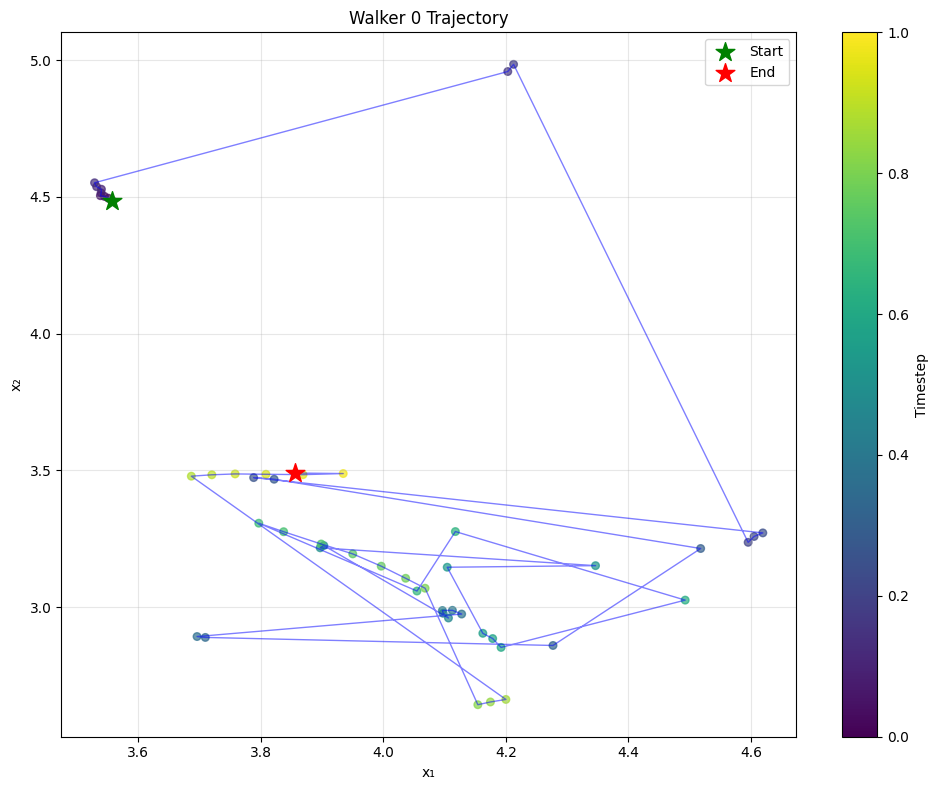

Trajectory length: 51 timesteps
Initial position: [3.558, 4.485]
Final position: [3.856, 3.490]
Total displacement: 1.039


In [7]:
if explorer.fractal_set is not None:
    import matplotlib.pyplot as plt
    import numpy as np
    
    fs = explorer.fractal_set
    
    # Get trajectory for walker 0
    traj = fs.get_walker_trajectory(walker_id=0, stage='final')
    x = traj['x'].cpu().numpy()  # [n_recorded, d]
    
    # Plot trajectory
    plt.figure(figsize=(10, 8))
    plt.plot(x[:, 0], x[:, 1], 'b-', alpha=0.5, linewidth=1)
    plt.scatter(x[:, 0], x[:, 1], c=np.arange(len(x)), cmap='viridis', s=30, alpha=0.7)
    plt.scatter(x[0, 0], x[0, 1], c='green', s=200, marker='*', label='Start', zorder=10)
    plt.scatter(x[-1, 0], x[-1, 1], c='red', s=200, marker='*', label='End', zorder=10)
    plt.colorbar(label='Timestep')
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Walker 0 Trajectory')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f'Trajectory length: {len(x)} timesteps')
    print(f'Initial position: [{x[0,0]:.3f}, {x[0,1]:.3f}]')
    print(f'Final position: [{x[-1,0]:.3f}, {x[-1,1]:.3f}]')
    print(f'Total displacement: {np.linalg.norm(x[-1] - x[0]):.3f}')
else:
    print('Run the simulation first')

## Graph Statistics Over Time

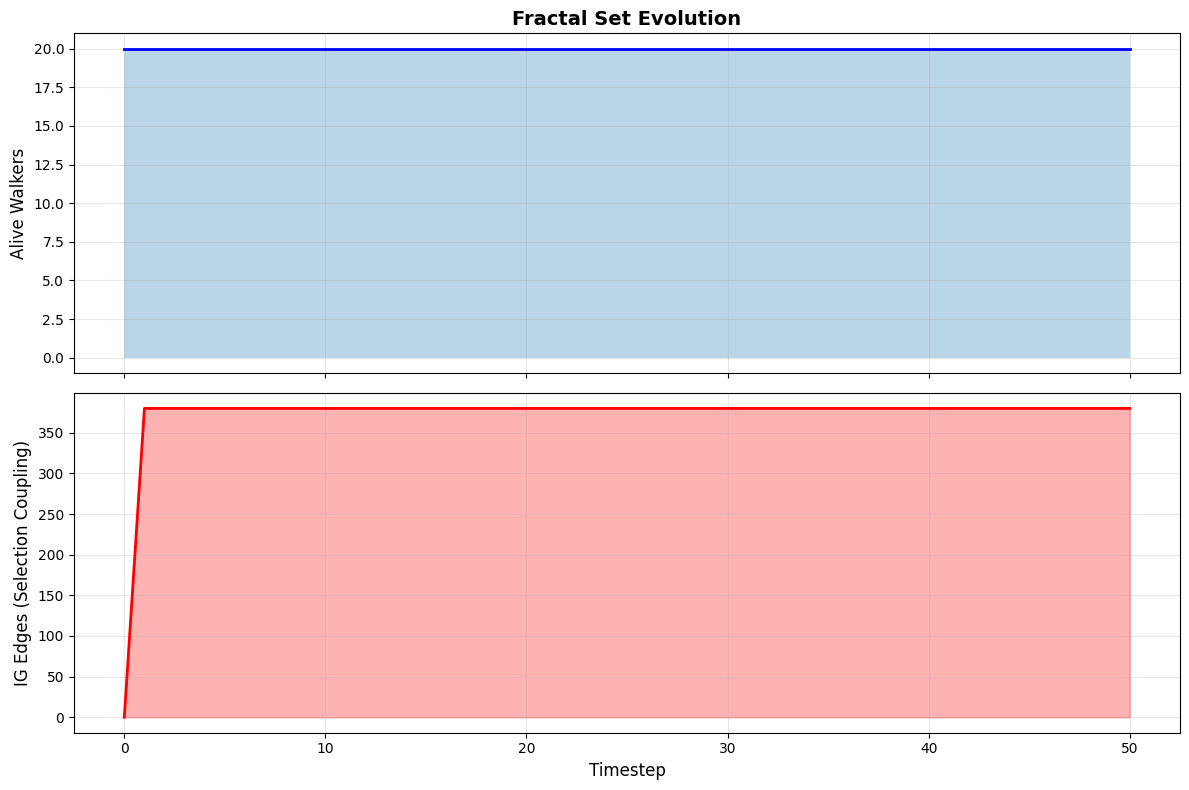

Initial alive walkers: 20
Final alive walkers: 20
Survival rate: 100.0%

Max IG edges: 380 (complete graph of 20 walkers)


In [8]:
if explorer.fractal_set is not None:
    import matplotlib.pyplot as plt
    import numpy as np
    
    fs = explorer.fractal_set
    
    # Compute statistics over time
    timesteps = []
    alive_counts = []
    ig_edge_counts = []
    
    for t in range(fs.n_recorded):
        alive = fs.get_alive_walkers(t)
        ig_graph = fs.get_ig_subgraph(timestep=t)
        
        timesteps.append(t)
        alive_counts.append(len(alive))
        ig_edge_counts.append(ig_graph.number_of_edges())
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Alive walkers
    ax1.plot(timesteps, alive_counts, 'b-', linewidth=2)
    ax1.fill_between(timesteps, alive_counts, alpha=0.3)
    ax1.set_ylabel('Alive Walkers', fontsize=12)
    ax1.set_title('Fractal Set Evolution', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # IG edges (selection coupling)
    ax2.plot(timesteps, ig_edge_counts, 'r-', linewidth=2)
    ax2.fill_between(timesteps, ig_edge_counts, alpha=0.3, color='red')
    ax2.set_xlabel('Timestep', fontsize=12)
    ax2.set_ylabel('IG Edges (Selection Coupling)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f'Initial alive walkers: {alive_counts[0]}')
    print(f'Final alive walkers: {alive_counts[-1]}')
    print(f'Survival rate: {alive_counts[-1]/alive_counts[0]*100:.1f}%')
    print(f'\nMax IG edges: {max(ig_edge_counts)} (complete graph of {int(np.sqrt(max(ig_edge_counts)))+1} walkers)')
else:
    print('Run the simulation first')

## Export Graph Data

You can export the Fractal Set graph for external analysis:

In [9]:
if explorer.fractal_set is not None:
    import os
    
    # Create output directory
    output_dir = 'fractal_set_output'
    os.makedirs(output_dir, exist_ok=True)
    
    # Save Fractal Set
    fs_path = os.path.join(output_dir, 'fractal_set.pkl')
    explorer.fractal_set.save(fs_path)
    print(f'✅ Saved Fractal Set to: {fs_path}')
    
    # Save RunHistory
    history_path = os.path.join(output_dir, 'run_history.pt')
    explorer.fractal_set.history.save(history_path)
    print(f'✅ Saved RunHistory to: {history_path}')
    
    # Export subgraphs
    import pickle
    
    cst_graph = explorer.fractal_set.get_cst_subgraph()
    with open(os.path.join(output_dir, 'cst_subgraph.pkl'), 'wb') as f:
        pickle.dump(cst_graph, f)
    print(f'✅ Saved CST subgraph')
    
    ig_graph = explorer.fractal_set.get_ig_subgraph()
    with open(os.path.join(output_dir, 'ig_subgraph.pkl'), 'wb') as f:
        pickle.dump(ig_graph, f)
    print(f'✅ Saved IG subgraph')
    
    print(f'\n📁 All data saved to: {output_dir}/')
else:
    print('Run the simulation first')

✅ Saved Fractal Set to: fractal_set_output/fractal_set.pkl
✅ Saved RunHistory to: fractal_set_output/run_history.pt
✅ Saved CST subgraph
✅ Saved IG subgraph

📁 All data saved to: fractal_set_output/


## Load Previously Saved Data

In [ ]:
# Example: Load saved data
# from fragile.core.fractal_set import FractalSet
# from fragile.core.history import RunHistory
# 
# history = RunHistory.load('fractal_set_output/run_history.pt')
# fs = FractalSet.load('fractal_set_output/fractal_set.pkl', history)
# print(fs.summary())